<a href="https://colab.research.google.com/github/Bhuvi237/ML-projects/blob/main/titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#Importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading csv dataset into pandas dataframe
data=pd.read_csv('/content/Titanic-Dataset.csv')

In [3]:
data.shape

(891, 12)

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Dataframe info like each label datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Finding no.of missing values in each column
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
#Handling missing values
data=data.drop(columns='Cabin',axis=1)
#Replacing missing values with mean
data['Age'].fillna(data['Age'].mean(),inplace=True)

/tmp/ipython-input-1290058883.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(),inplace=True)


In [8]:
print(data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [9]:
print(data['Embarked'].mode()[0])

S


In [10]:
#Replacing missing values with mode
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)
data.isnull().sum()

/tmp/ipython-input-262614522.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [31]:
#getting statistical measures
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [11]:
#count of different values
data['Embarked'].value_counts()


,count
Embarked,
S,646
C,168
Q,77


In [12]:
data['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [13]:
#Encoding categorial features
data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

/tmp/ipython-input-2063959684.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)


In [14]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [15]:
#Feature extraction
x=data.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
y=data['Survived']

In [16]:
print(x)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [17]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [18]:
#Standardizing features
scaler=StandardScaler()
scaler.fit(x)
standardized_data=scaler.transform(x)
print(standardized_data)


[[ 0.82737724 -0.73769513 -0.5924806  ... -0.47367361 -0.50244517
  -0.56883712]
 [-1.56610693  1.35557354  0.63878901 ... -0.47367361  0.78684529
   1.00518113]
 [ 0.82737724  1.35557354 -0.2846632  ... -0.47367361 -0.48885426
  -0.56883712]
 ...
 [ 0.82737724  1.35557354  0.         ...  2.00893337 -0.17626324
  -0.56883712]
 [-1.56610693 -0.73769513 -0.2846632  ... -0.47367361 -0.04438104
   1.00518113]
 [ 0.82737724 -0.73769513  0.17706291 ... -0.47367361 -0.49237783
   2.57919938]]


In [19]:
x=standardized_data
y=data['Survived']
print(x)

[[ 0.82737724 -0.73769513 -0.5924806  ... -0.47367361 -0.50244517
  -0.56883712]
 [-1.56610693  1.35557354  0.63878901 ... -0.47367361  0.78684529
   1.00518113]
 [ 0.82737724  1.35557354 -0.2846632  ... -0.47367361 -0.48885426
  -0.56883712]
 ...
 [ 0.82737724  1.35557354  0.         ...  2.00893337 -0.17626324
  -0.56883712]
 [-1.56610693 -0.73769513 -0.2846632  ... -0.47367361 -0.04438104
   1.00518113]
 [ 0.82737724 -0.73769513  0.17706291 ... -0.47367361 -0.49237783
   2.57919938]]


In [20]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


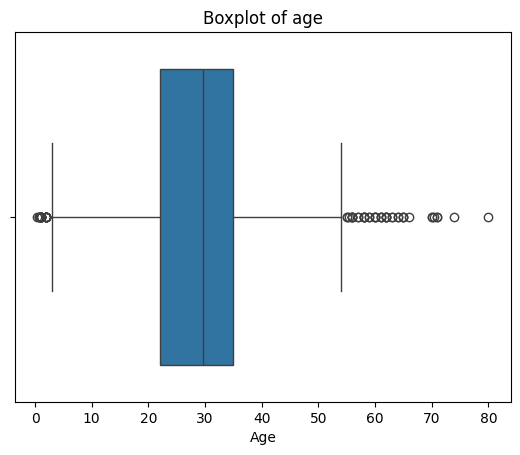

In [23]:
sns.boxplot(x=data['Age'])
plt.title('Boxplot of age')
plt.show()

In [30]:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
Age_no_outliers = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]


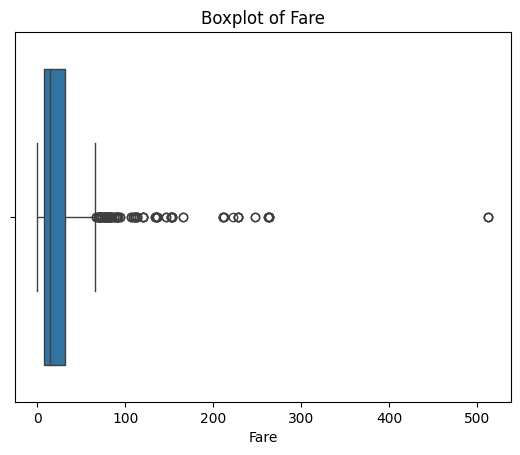

In [28]:
sns.boxplot(x=data['Fare'])
plt.title('Boxplot of Fare')
plt.show()

In [29]:
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
Fare_no_outliers = data[(data['Fare'] >= lower_bound) & (data['Fare'] <= upper_bound)]